In [1]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [7]:
adult_info = pd.read_csv("../data/adult.csv")
df_cleaned = adult_info.replace("?", pd.NA).dropna()

df_cleaned

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,36
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173
32558,32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,40
32559,32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,38


# Task 1
Print the count of men and women in the dataset.

In [12]:

counter = df_cleaned["sex"].value_counts()

print("Men:", counter["Male"])
print("Women:", counter["Female"])



Men: 20380
Women: 9782


# Task 2
Find the average age of men in dataset

In [14]:

men_data = df_cleaned[df_cleaned["sex"] == "Male"]
average_age_men = men_data["age"].mean()
average_age_men

39.18400392541707

# Task 3
Get the percentage of people from Poland (native-country)

In [17]:

from_poland_percent = (df_cleaned["native-country"] == "Poland").mean() * 100
from_poland_percent

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [19]:

mean_age_high_income = df_cleaned[df_cleaned["salary"] == ">50K"]["age"].mean()
std_age_high_income = df_cleaned[df_cleaned["salary"] == ">50K"]["age"].std()
mean_age_low_income = df_cleaned[df_cleaned["salary"] == "<=50K"]["age"].mean()
std_age_low_income = df_cleaned[df_cleaned["salary"] == "<=50K"]["age"].std()

print("Mean age with salary > 50K:", mean_age_high_income)
print("Standard deviation with salary > 50K:", std_age_high_income)

print("Mean age with salary <= 50K:", mean_age_low_income)
print("Standard deviation with salary <= 50K:", std_age_low_income)

Mean age with salary > 50K: 43.95911028236548
Standard deviation with salary > 50K: 10.269632835673852
Mean age with salary <= 50K: 36.60806038668668
Standard deviation with salary <= 50K: 13.464631257161633


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [20]:

education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
people_without_education = df_cleaned[(~df_cleaned["education"].isin(education)) & (df_cleaned["salary"] == ">50K")]
people_without_education

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
55,55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
68,68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,32462,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K,343
32518,32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [23]:

df.groupby("education")["age"].describe()
df


,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,36
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173
32558,32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,40
32559,32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,38


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [26]:
df = pd.read_csv("../data/adult.csv", na_values="?")
married = df[df["marital-status"].str.startswith("Married")]
non_married = df[~df["marital-status"].str.startswith("Married")]
avg_married_salary = married["salary K$"].mean()
avg_non_married_salary = non_married["salary K$"].mean()
print("Married salary:", avg_married_salary)
print("Non married salary:", avg_non_married_salary)

Married salary: 105.98735162482973
Non married salary: 42.71762715818945


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [28]:
max_hours_per_week = df_cleaned["hours-per-week"].max()

people_with_max_hours = df_cleaned[df_cleaned["hours-per-week"] == max_hours_per_week]
num_people_with_max_hours = len(people_with_max_hours)

print("Max hours:", max_hours_per_week)
print("Number of people:", num_people_with_max_hours)

Max hours: 99
Number of people: 78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

<Axes: >

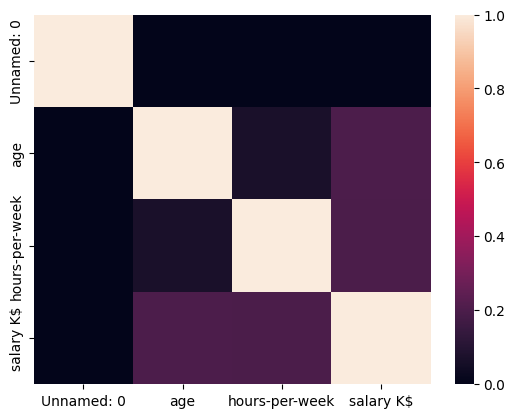

In [31]:
import seaborn as sns
corr = adult_info.corr()
sns.heatmap(corr)